## set the directory 

In [36]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [88]:
myfile = open('gdrive/MyDrive/Untitled.rtf')
#print(myfile.read())

In [38]:
!ls

gdrive	sample_data


In [39]:
#!pip install tensorflow==2.4

In [40]:
import tensorflow as tf

In [41]:
tf.__version__

'2.4.1'

### tensorflow documentation
1. tf.keras
2. tf.data

# Week 2

## keras

**example: **
\
from tensorflow.keras.models import Sequencial 
from tensorflow.keras.layers import Dense

model = Sequencial([
                    Dense(64, activation = 'relu', input_shape = (784, )),
                    Desen(10, activation = 'softmax')
])
\
\
**or: **
\
model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(10, activation = 'Softmax'))
\
\
**or: **
\
from tensorflow.keras.models import Sequencial 
from tensorflow.keras.layers import Flattern, Dense #importing two layer types, 

model = Sequential([
  Flatten(input_shape = (28, 28)), #(784, )
  Dense(64, activation = 'relu'),
  Dense(10, activation='softmax')
])




In [42]:
import tensorflow as tf
print(tf.__version__)

2.4.1


## buidling a sequencial model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

In [44]:
# build a feedforward neural network model

model = Sequential([
                    Flatten(input_shape = (28, 28)),
                     Dense(16, activation='relu'),
                     Dense(16, activation='relu'),
                     Dense(10, activation='softmax')
 ])

In [45]:
# print the model summary 
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[-0.06881519,  0.0267984 ,  0.06040482, ..., -0.07250033,
         -0.04165928,  0.01652335],
        [-0.06712843,  0.02451083, -0.00286604, ..., -0.00356296,
          0.05664487, -0.06251019],
        [-0.06636852, -0.01976561,  0.05533181, ..., -0.03097941,
          0.0671923 ,  0.07679647],
        ...,
        [ 0.0099555 ,  0.04761758,  0.08117869, ...,  0.0082216 ,
          0.04090729, -0.04186653],
        [-0.07063329, -0.07413534, -0.00749902, ...,  0.02081211,
         -0.02314015, -0.06167324],
        [ 0.06688593,  0.04431061,  0.06055011, ...,  0.05941266,
          0.01516477,  0.07140529]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense_7/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[-0.0557209 ,  0.1612843 , -0.00092998, -0.086

In [46]:
# more clearer way to check the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [47]:
model = Sequential([
                    Flatten(input_shape = (28, 28)),
                     Dense(16, activation='relu', name = 'layer_1'),
                     Dense(16, activation='relu'),
                     Dense(10),
                    Softmax()
 ])

In [48]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


## Convolutional and pooling layers 

**example **

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flattern, Dense, Cov2D, MaxPooling2D

In [49]:
#example

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

In [50]:

model = Sequential([
                    Conv2D(16, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),  #original picture: 32*32 3D. using 16 3*3 filters 
                    MaxPooling2D((3, 3)), #pooling window size 
                    Flatten(),
                    Dense(64, activation='relu'), 
                    Dense(10, activation='softmax')
])

In [51]:
model.summary()

# None: means the batch size
'''
layer1: 16: we created the layer with 16 filters, 30 = 32 - 3 + 1, there is no zero padding by default 
layer2: pooling is non-overlapping, 30/3 = 10
flattern: 16*10*10
Dense1: 1601*64
Dense2: 65*10
'''

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 103,562
Trainable params: 103,562
Non-trainable params: 0
_________________________________________________________________


'\nlayer1: 16: we created the layer with 16 filters, 30 = 32 - 3 + 1, there is no zero padding by default \nlayer2: pooling is non-overlapping, 30/3 = 10\nflattern: 16*10*10\nDense1: 1601*64\nDense2: 65*10\n'

In [52]:
same_padding = Sequential([
                    Conv2D(16, kernel_size = (3, 3), padding = 'SAME',
                           activation = 'relu', input_shape = (32, 32, 3)),  #original picture: 32*32 3D. using 16 3*3 filters 
                    MaxPooling2D((3, 3)), #pooling window size 
                    Flatten(),
                    Dense(64, activation='relu'), 
                    Dense(10, activation='softmax')
])

In [53]:
same_padding.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 103,562
Trainable params: 103,562
Non-trainable params: 0
_________________________________________________________________


In [54]:
# build the sequential convolutional neural network model
# remember to define channels_first for the pooling layer to have exactly the same neural network as before 

model = Sequential([
                    Conv2D(16, (3, 3,), padding = 'SAME', strides = 2, activation='relu', input_shape = (28, 28, 1), data_format='channels_first'), # default is channels_last, if it changes to channels_first: input_shape will change to (1, 28, 28)
                    MaxPooling2D((3, 3)), 
                    Flatten(),
                    Dense(10, activation = 'softmax')
])

In [55]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 16, 14, 1)         4048      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 4, 1)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                210       
Total params: 4,258
Trainable params: 4,258
Non-trainable params: 0
_________________________________________________________________


## the compile method

In [56]:
# example 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
                    Dense(64, activation='elu', input_shape = (32, )),
                    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'sgd', #'adam', 'rmsprop', 'adadelta'
    loss = 'binary_crossentropy', # binary cross entropy suitable for binary classification issues #'mean_squared_error' (regression task), 'categorical_crossentropy'
    metrics = ['accuracy', 'mae'] # mae: mean absolute error
)

In [57]:
# or: 
# this will give more flexibility, as many of these objects themselves have options that you might want to have control over. 

model = Sequential([
                    Dense(64, activation='elu', input_shape = (32, )),
                    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = [tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.MeanAbsoluteError()] 
)

model_1 = Sequential([
                    Dense(64, activation='elu', input_shape = (32, )),
                    Dense(1, activation='linear')
])

model_1.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), # from_logits=True: tells the loss functionitself shouls handle the squeezing of the output through the sigmoid activation. it has a more numerically stable approach. 
    metrics = [tf.keras.metrics.BinaryAccuracy(threshold=0.7), tf.keras.metrics.MeanAbsoluteError()] 
)


In [58]:
# tutorials 

# in order to tune a apecific parameters: 
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()


model.compile(
    optimizer = opt,
    loss = 'sparse_categorical_crossentropy', # sparse_categorical_crossentropy for data labels are integers, categorical_crossentropy: if the data labels are vectors. 
    metrics = [acc, mae]
)

In [59]:
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


## Optimisers, loss functions and metrics

## train the models

In [60]:
# example 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
                    Dense(64, activation='elu', input_shape=(32,)),
                    Dense(100, activation='softmax')
])

model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

# model.fit(X_trian, y_train)
# X_train: (num_samples, num_features)
# y_train: (num_samples, num_features)

# under the sparse categorical issue: 
model = Sequential([
                    Dense(64, activation='elu', input_shape=(32,)),
                    Dense(100, activation='softmax')
])

model.compile(
    optimizer = 'rmsprop',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# epochs: the training will make 10 complete passes through the dataset
#batch_size: default = 32, 

# histrory = model.fit(X_trian, y_train, epochs = 10, batch_size = 16) 
# X_train: (num_samples, num_features)
# y_train: (num_samples, )

In [61]:
# tutorials

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [62]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential([
                    Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    MaxPooling2D((3, 3)),
                    Flatten(),
                    Dense(10, activation = 'softmax')
])

In [64]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()


model.compile(
    optimizer = opt,
    loss = 'sparse_categorical_crossentropy', # sparse_categorical_crossentropy for data labels are integers, categorical_crossentropy: if the data labels are vectors. 
    metrics = [acc, mae]
)

In [65]:
train_images.shape

(60000, 28, 28)

In [66]:
# define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels)

[9 0 0 ... 3 0 5]


In [67]:
# rescale the image values so that they lie in between 0 and 1

train_images = train_images/255.
test_images = test_images/255.

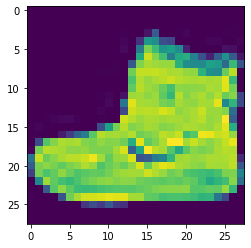

label: Ankle boot


In [68]:
# display one of the images 

i = 0 
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

In [69]:
# fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256)

Epoch 1/8
235/235 [==============================] - 13s 53ms/step - loss: 0.7969 - sparse_categorical_accuracy: 0.7228 - mean_absolute_error: 4.4234
Epoch 2/8
235/235 [==============================] - 12s 52ms/step - loss: 0.3790 - sparse_categorical_accuracy: 0.8675 - mean_absolute_error: 4.4281
Epoch 3/8
235/235 [==============================] - 12s 52ms/step - loss: 0.3368 - sparse_categorical_accuracy: 0.8834 - mean_absolute_error: 4.4191
Epoch 4/8
235/235 [==============================] - 13s 54ms/step - loss: 0.3216 - sparse_categorical_accuracy: 0.8851 - mean_absolute_error: 4.4179
Epoch 5/8
235/235 [==============================] - 13s 54ms/step - loss: 0.3022 - sparse_categorical_accuracy: 0.8921 - mean_absolute_error: 4.4138
Epoch 6/8
235/235 [==============================] - 12s 52ms/step - loss: 0.2903 - sparse_categorical_accuracy: 0.8980 - mean_absolute_error: 4.4086
Epoch 7/8
235/235 [==============================] - 12s 52ms/step - loss: 0.2812 - sparse_categoric

In [70]:
# plot the training history 

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.557174,0.802300,4.419998
1,0.369651,0.870133,4.420000
2,0.335821,0.882083,4.420001
3,0.314671,0.887167,4.420000
4,0.301135,0.892267,4.420000


[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epochs')]

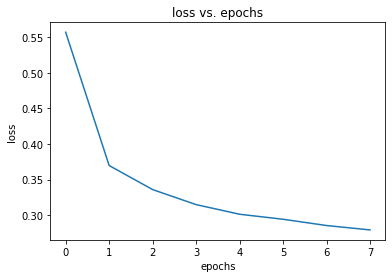

In [71]:
# plot the loss

loss_plot = df.plot(
    y="loss", 
    title = "loss vs. epochs",
    legend = False
)

loss_plot.set(
    xlabel = "epochs",
    ylabel = "loss"
)

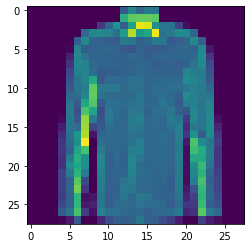

Label: Shirt


In [72]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

## the evaluation and predict methods


In [80]:
loss, accuracy, mae = model.evaluate(test_images[...,np.newaxis], test_labels, verbose = 2) #[...,np.newaxis]: add dummy channel dimension 

313/313 - 1s - loss: 0.3210 - sparse_categorical_accuracy: 0.8844 - mean_absolute_error: 4.4200


In [77]:
pred = model.predict(train_images[...,np.newaxis])

In [78]:
pred

array([[2.23723085e-08, 4.11903928e-10, 2.20186109e-08, ...,
        6.53175288e-04, 4.92600111e-06, 9.99159575e-01],
       [9.99059141e-01, 1.13738416e-07, 7.13804329e-04, ...,
        3.04446095e-12, 1.48184355e-07, 2.30618085e-12],
       [8.05087388e-01, 1.83736696e-03, 1.51470006e-02, ...,
        2.30803635e-04, 1.37597468e-04, 8.99589359e-05],
       ...,
       [1.65055520e-04, 2.89955869e-06, 4.90738777e-04, ...,
        6.47014803e-11, 2.36678900e-07, 3.46632806e-10],
       [7.82687962e-01, 1.07335472e-04, 9.33099240e-02, ...,
        8.47115371e-06, 4.48801700e-04, 3.83620403e-07],
       [6.70253684e-08, 3.39321438e-09, 1.35885432e-06, ...,
        6.24104068e-05, 5.25309842e-05, 1.92491598e-07]], dtype=float32)

In [79]:
import matplotlib.pyplot as plt
import numpy as np


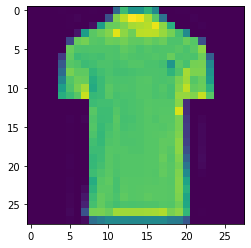

label: T-shirt/top


In [82]:
# make prediction from the model

# choose a random test image

random_inx = np.random.choice(test_images.shape[0])
inx = 30

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"label: {labels[test_labels[random_inx]]}")

In [87]:
# get the model prediction 

prediction = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(f"model prediction: {labels[np.argmax(prediction)]}")

model prediction: T-shirt/top
